<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/Density_in_Gas_Condensate_(CVD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install neqsim
!pip install git+https://github.com/equinor/neqsim-python.git

  Cloning https://github.com/equinor/neqsim-python.git to /tmp/pip-req-build-bbet6lel
  Running command git clone --filter=blob:none --quiet https://github.com/equinor/neqsim-python.git /tmp/pip-req-build-bbet6lel
  Resolved https://github.com/equinor/neqsim-python.git to commit 40b53008d5e699db03d64c73e664ad3e257ab004
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import neqsim
from neqsim import jNeqSim
from neqsim.thermo.thermoTools import readEclipseFluid, TPflash, printFrame
from neqsim.thermo.thermoTools import *
from neqsim import methods
from neqsim.process import stream,  compressor, runProcess,clearProcess,GORfitter

In [ ]:
dataset = pd.read_excel('well stream composition_Gas Condensate.xlsx')
Z_prode_1 = dataset.iloc[4:, 5:27].values
Z_prode_2 = dataset.iloc[4:, 27:49].values
Reservoir_Presseure = dataset.iloc[4:, 49].values
time = dataset.iloc[4:, 0].values

In [ ]:
Exact_Density_oil_1 = np.zeros(len(time))
Exact_Density_oil_2 = np.zeros(len(time))
Exact_Density_gas_1 = np.zeros(len(time))
Exact_Density_gas_2 = np.zeros(len(time))
Exact_GOR_1 = np.zeros(len(time))
Exact_GOR_2 = np.zeros(len(time))

fluid1 = readEclipseFluid('Eclips_EOS_Model.txt')
fluid1.setMultiPhaseCheck(True)

fluid1.setPressure(15, 'bara')
fluid1.setTemperature(40, 'C')
TPflash(fluid1)
printFrame(fluid1)


fluid1.initProperties()

Density_original_oil = fluid1.getPhase('oil').getDensity('kg/m3')
Density_original_gas = fluid1.getPhase('gas').getDensity('kg/m3')

Mixture_Density_1 = np.zeros(len(time))
Mixture_Density_2 = np.zeros(len(time))

| 0                    | 1          | 2           | 3           | 4   | 5   | 6               |
|:---------------------|:-----------|:------------|:------------|:----|:----|:----------------|
|                      | total      | GAS         | OIL         |     |     |                 |
| nitrogen             | 1.2811E-2  | 1.31572E-2  | 3.12537E-4  |     |     | [mole fraction] |
| CO2                  | 4.07892E-3 | 4.17284E-3  | 6.89E-4     |     |     | [mole fraction] |
| methane              | 7.81998E-1 | 8.02033E-1  | 5.88636E-2  |     |     | [mole fraction] |
| ethane               | 8.05687E-2 | 8.20147E-2  | 2.83761E-2  |     |     | [mole fraction] |
| propane              | 5.63365E-2 | 5.62281E-2  | 6.02507E-2  |     |     | [mole fraction] |
| i-butane             | 6.57959E-3 | 6.34748E-3  | 1.49572E-2  |     |     | [mole fraction] |
| n-butane             | 1.95043E-2 | 1.83889E-2  | 5.97601E-2  |     |     | [mole fraction] |
| i-pentane            | 5.1004E-3  | 4.

In [ ]:
ii=0
for ii in range(len(time)):
  newMolarCompositions = [Z_prode_1[ii,0],Z_prode_1[ii,1],Z_prode_1[ii,2],Z_prode_1[ii,3],Z_prode_1[ii,4],Z_prode_1[ii,5],
                             Z_prode_1[ii,6],Z_prode_1[ii,7],Z_prode_1[ii,8],Z_prode_1[ii,9],Z_prode_1[ii,10],Z_prode_1[ii,11],
                             Z_prode_1[ii,12],Z_prode_1[ii,13],Z_prode_1[ii,14],Z_prode_1[ii,15],Z_prode_1[ii,16],Z_prode_1[ii,17],
                             Z_prode_1[ii,18],Z_prode_1[ii,19],Z_prode_1[ii,20],Z_prode_1[ii,21]]


  fluid1.setMolarComposition(newMolarCompositions)

  fluid1.setPressure(15.0, 'bara')
  fluid1.setTemperature(40.0, 'C')
  TPflash(fluid1)
  fluid1.initProperties()

  Exact_Density_gas_1 [ii] = fluid1.getPhase('gas').getDensity('kg/m3')
  Exact_Density_oil_1 [ii] = fluid1.getPhase('oil').getDensity('kg/m3')
  Mixture_Density_1 [ii] = (Exact_Density_oil_1 [ii] * fluid1.getPhase('oil').getCorrectedVolume() + Exact_Density_gas_1 [ii] * fluid1.getPhase('gas').getCorrectedVolume())/(fluid1.getPhase('gas').getCorrectedVolume() + fluid1.getPhase('oil').getCorrectedVolume())
  Exact_GOR_1 [ii] = fluid1.getPhase('gas').getCorrectedVolume() / fluid1.getPhase('oil').getCorrectedVolume()

ii=0
for ii in range(len(time)):
  newMolarCompositions = [Z_prode_2[ii,0],Z_prode_2[ii,1],Z_prode_2[ii,2],Z_prode_2[ii,3],Z_prode_2[ii,4],Z_prode_2[ii,5],
                             Z_prode_2[ii,6],Z_prode_2[ii,7],Z_prode_2[ii,8],Z_prode_2[ii,9],Z_prode_2[ii,10],Z_prode_2[ii,11],
                             Z_prode_2[ii,12],Z_prode_2[ii,13],Z_prode_2[ii,14],Z_prode_2[ii,15],Z_prode_2[ii,16],Z_prode_2[ii,17],
                             Z_prode_2[ii,18],Z_prode_2[ii,19],Z_prode_2[ii,20],Z_prode_2[ii,21]]


  fluid1.setMolarComposition(newMolarCompositions)

  fluid1.setPressure(15.0, 'bara')
  fluid1.setTemperature(40.0, 'C')
  TPflash(fluid1)

  fluid1.initProperties()

  Exact_Density_gas_2 [ii] = fluid1.getPhase('gas').getDensity('kg/m3')
  Exact_Density_oil_2 [ii] = fluid1.getPhase('oil').getDensity('kg/m3')
  Mixture_Density_2 [ii] = (Exact_Density_oil_2 [ii] * fluid1.getPhase('oil').getCorrectedVolume() + Exact_Density_gas_2 [ii] * fluid1.getPhase('gas').getCorrectedVolume())/(fluid1.getPhase('gas').getCorrectedVolume() + fluid1.getPhase('oil').getCorrectedVolume())
  Exact_GOR_2 [ii] = fluid1.getPhase('gas').getCorrectedVolume() / fluid1.getPhase('oil').getCorrectedVolume()

In [ ]:
print(Reservoir_Presseure)
print(Mixture_Density_1)
print(Exact_GOR_1)

[200.70042419433594 154.5240020751953 139.74258422851562
 127.99259185791016 117.8219223022461 108.8037109375 91.38479614257812
 82.09349822998047 62.5650749206543 38.90864944458008]
[14.35910416 14.13055568 13.96443232 13.83660177 13.73554861 13.65639339
 13.53907427 13.50014323 13.49180798 13.71382914]
[ 438.65444019  514.81628204  590.37770454  666.48916204  743.29623548
  818.63693207  972.63485832 1047.45715627 1121.96374396  893.95049142]


In [ ]:
GOR_MPFM_1 = np.zeros(len(time))
GOR_MPFM_2 = np.zeros(len(time))

ii=0
for ii in range(len(time)):

  GOR_MPFM_1 [ii] = (Density_original_oil - Mixture_Density_1 [ii]) / (Mixture_Density_1 [ii] - Density_original_gas)
  GOR_MPFM_2 [ii] = (Density_original_oil - Mixture_Density_2 [ii]) / (Mixture_Density_2 [ii] - Density_original_gas)
  #Exact_GOR_1 [ii] = (Exact_Density_oil_1[ii] - Mixture_Density_1[ii]) / (Mixture_Density_1[ii] - Exact_Density_gas_1 [ii])
  #Exact_GOR_2 [ii] = (Exact_Density_oil_2[ii] - Mixture_Density_2[ii]) / (Mixture_Density_2[ii] - Exact_Density_gas_2 [ii])

In [ ]:
fluid2 = readEclipseFluid('Eclips_EOS_Model.txt')
fluid2.setMultiPhaseCheck(True)

Component_Name = fluid2.getComponentNames()

GOR_Calculated_1 = np.zeros(len(time))
GOR_Calculated_2 = np.zeros(len(time))

GOR_1 = GOR_MPFM_1
GOR_2 = np.zeros(len(time))

GOR_Calculated_1 = GOR_MPFM_1
GOR_Calculated_2 = GOR_MPFM_2

New_Density_gas_1 = np.zeros(len(time))
New_Density_oil_1 = np.zeros(len(time))
New_Density_gas_2 = np.zeros(len(time))
New_Density_oil_2 = np.zeros(len(time))

Z_calculated_prode_1 = np.zeros((len(time), len(Component_Name)))
Z_calculated_prode_2 = np.zeros((len(time), len(Component_Name)))

In [ ]:
fluid1 = readEclipseFluid('Eclips_EOS_Model.txt')
fluid1.setMultiPhaseCheck(True)


fluid1.setPressure(15.0, 'bara')
fluid1.setTemperature(40.0, 'C')
TPflash(fluid1)

satPresSim = jNeqSim.PVTsimulation.simulation.SaturationPressure(fluid1)
satPresSim.setTemperature(90.0, "C")
satPresSim.run()

print('saturation pressure ', satPresSim.getThermoSystem().getPressure(), ' bara')

start_pressure = satPresSim.getThermoSystem().getPressure()

saturation pressure  199.45807075500488  bara


In [ ]:
fluid2 = readEclipseFluid('Eclips_EOS_Model.txt')
#fluid2.setMultiPhaseCheck(True)

Reservoir_Temperature = 363.15
pressure_inlet = 15.0
temperature_inlet = 40.0
nn = 0
jj = 0
Error = 1
X = 0

for nn in range(len(time)):

  while (np.abs(Error) > 0.5):

    #print(nn)
    stop_pressure = Reservoir_Presseure[nn]
    print('res pressure ', stop_pressure)
    pressures = np.linspace(start_pressure + 10, stop_pressure, 10)

    CVDsim = jNeqSim.PVTsimulation.simulation.ConstantVolumeDepletion(fluid2.clone())
    CVDsim.setPressures(pressures.tolist())
    CVDsim.setTemperature(90.0, "C")
    CVDsim.runCalc()

    GasFluid = CVDsim.getThermoSystem().phaseToSystem('gas')
    OilFluid = CVDsim.getThermoSystem().phaseToSystem('oil')
    #GasFluid.setMultiPhaseCheck(True)

    printFrame(CVDsim.getThermoSystem())
    #printFrame(OilFluid)

    #for jj in range(len(Component_Name)):
      #newMolarCompositions[jj] = fluid2.getPhase('gas').getComponent(Component_Name[jj]).getx()

    #fluid2.setMolarComposition(newMolarCompositions)
    #jj = 0
    X = GOR_Calculated_1 [nn]


    clearProcess()
    inletStream  = stream(CVDsim.getThermoSystem().phaseToSystem('gas'))
    inletStream.setTemperature(temperature_inlet, 'C')
    inletStream.setPressure(pressure_inlet, 'bara')

    GORfitter1 = GORfitter(inletStream)
    GORfitter1.setGOR(GOR_Calculated_1 [nn])
    GORfitter1.setReferenceConditions('actual')
    runProcess()


    printFrame(GORfitter1.getOutStream().getFluid())
    GORfitter1.getOutStream().getFluid().initPhysicalProperties('density')

    for jj in range(len(Component_Name)):
      newMolarCompositions[jj] = GORfitter1.getOutStream().getFluid().getComponent(Component_Name[jj]).getz()
      Z_calculated_prode_1 [nn][jj] = GORfitter1.getOutStream().getFluid().getComponent(Component_Name[jj]).getz()

    jj = 0
    #print(newMolarCompositions)
    #fluid2 = readEclipseFluid('Eclips_EOS_Model.txt')
    #fluid2.setMolarComposition(newMolarCompositions)

    #fluid2.setPressure(pressure_inlet, 'bara')
    #fluid2.setTemperature(temperature_inlet, 'C')
    #TPflash(fluid2)

    #if(GORfitter1.getOutStream().getFluid().hasPhaseType('oil')):
    New_Density_oil_1 [nn] = GORfitter1.getOutStream().getFluid().getPhase('oil').getDensity('kg/m3')

    New_Density_gas_1 [nn] = GORfitter1.getOutStream().getFluid().getPhase('gas').getDensity('kg/m3')

    GOR_Calculated_1 [nn] = (New_Density_oil_1 [nn] - Mixture_Density_1 [nn]) / (Mixture_Density_1 [nn] - New_Density_gas_1 [nn])
    print(GOR_Calculated_1 [nn])

    Error = ((GOR_Calculated_1 [nn] - X)/X)*100

    #print(New_Density_oil_1 [nn])
    #print(New_Density_gas_1[nn])
    print(X)

    print('err ' , Error)
    fluid2.setMolarComposition(newMolarCompositions)

  Error = 1
  fluid2 = readEclipseFluid('Eclips_EOS_Model.txt')


res pressure  200.70042419433594
| 0                    | 1          | 2                  | 3   | 4   | 5   | 6               |
|:---------------------|:-----------|:-------------------|:----|:----|:----|:----------------|
|                      | total      | GAS                |     |     |     |                 |
| nitrogen             | 1.2811E-2  | 1.2811E-2          |     |     |     | [mole fraction] |
| CO2                  | 4.07892E-3 | 4.07892E-3         |     |     |     | [mole fraction] |
| methane              | 7.81998E-1 | 7.81998E-1         |     |     |     | [mole fraction] |
| ethane               | 8.05687E-2 | 8.05687E-2         |     |     |     | [mole fraction] |
| propane              | 5.63365E-2 | 5.63365E-2         |     |     |     | [mole fraction] |
| i-butane             | 6.57959E-3 | 6.57959E-3         |     |     |     | [mole fraction] |
| n-butane             | 1.95043E-2 | 1.95043E-2         |     |     |     | [mole fraction] |
| i-pentane      

In [ ]:
GOR_Calculated_1


array([ 438.70094829,  514.86377166,  590.36591489,  666.33212537,
        742.80847041,  817.49596899,  967.86991091, 1038.5175284 ,
       1097.93466257,  862.82316455])

In [ ]:
GOR_Calculated_1

array([ 438.70094829,  514.86377166,  590.36591489,  666.33212537,
        742.80847041,  817.49596899,  967.86991091, 1038.5175284 ,
       1097.93466257,  862.82316455])

In [ ]:
pressure_inlet = 15.0
temperature_inlet = 40.0
nn = 0
jj = 0
Error = 1
Reservoir_Temperature = 363.15

fluid2 = readEclipseFluid('Eclips_EOS_Model.txt')
#fluid2.setMultiPhaseCheck(True)

for nn in range(len(time)):

  while (np.abs(Error) > 0.5):

    stop_pressure = Reservoir_Presseure[nn]
    #print('res pressure ', stop_pressure)
    pressures = np.linspace(start_pressure+10, stop_pressure, 10)

    CVDsim = jNeqSim.PVTsimulation.simulation.ConstantVolumeDepletion(fluid2.clone());
    CVDsim.setPressures(pressures.tolist())
    CVDsim.setTemperature(Reservoir_Temperature, "K")
    CVDsim.runCalc()

    GasFluid = CVDsim.getThermoSystem().phaseToSystem('gas')
    OilFluid = CVDsim.getThermoSystem().phaseToSystem('oil')

    #printFrame(fluid2)
    #printFrame(GasFluid)
    #printFrame(OilFluid)

    #for jj in range(len(Component_Name)):
      #newMolarCompositions[jj] = fluid2.getPhase('gas').getComponent(Component_Name[jj]).getx()

    #fluid2.setMolarComposition(newMolarCompositions)
    #jj = 0
    X = GOR_Calculated_2 [nn]

    #print(nn)
    clearProcess()
    inletStream  = stream(CVDsim.getThermoSystem().phaseToSystem('gas'))
    inletStream.setTemperature(temperature_inlet, 'C')
    inletStream.setPressure(pressure_inlet, 'bara')

    GORfitter1 = GORfitter(inletStream)
    GORfitter1.setGOR(GOR_Calculated_2 [nn])
    GORfitter1.setReferenceConditions('actual')
    runProcess()

    GORfitter1.getOutStream().getFluid().initPhysicalProperties()

    for jj in range(len(Component_Name)):
      newMolarCompositions[jj] = GORfitter1.getOutStream().getFluid().getComponent(Component_Name[jj]).getz()
      Z_calculated_prode_2 [nn][jj] = GORfitter1.getOutStream().getFluid().getComponent(Component_Name[jj]).getz()

    jj = 0
    #print(newMolarCompositions)
    #fluid2 = readEclipseFluid('Eclips_EOS_Model.txt')
    #fluid2.setMolarComposition(newMolarCompositions)

    #fluid2.setPressure(pressure_inlet, 'bara')
    #fluid2.setTemperature(temperature_inlet, 'C')
    #TPflash(fluid2)


    New_Density_oil_2 [nn] = GORfitter1.getOutStream().getFluid().getPhase('oil').getDensity('kg/m3')
    New_Density_gas_2 [nn] = GORfitter1.getOutStream().getFluid().getPhase('gas').getDensity('kg/m3')
    #Mixture_Density_2 [nn] =  GORfitter1.getOutStream().getFluid().getDensity('kg/m3')
    #print(New_Density_oil_2[nn])


    GOR_Calculated_2 [nn] = (New_Density_oil_2 [nn] - Mixture_Density_2 [nn]) / (Mixture_Density_2 [nn] - New_Density_gas_2 [nn])


    Error = ((GOR_Calculated_2 [nn] - X)/X)*100


    #print(X)
    #print(GOR_Calculated_2[nn])
    #print(Error)
    fluid2.setMolarComposition(newMolarCompositions)

  Error = 1
  fluid2 = readEclipseFluid('Eclips_EOS_Model.txt')

In [ ]:
pressures

array([209.45807076, 190.50813505, 171.55819935, 152.60826365,
       133.65832795, 114.70839225,  95.75845655,  76.80852085,
        57.85858515,  38.90864944])

In [ ]:
GOR_MPFM_1 = np.zeros(len(time))
GOR_MPFM_2 = np.zeros(len(time))

ii=0
for ii in range(len(time)):

  GOR_MPFM_1 [ii] = (Density_original_oil - Mixture_Density_1 [ii]) / (Mixture_Density_1 [ii] - Density_original_gas)
  GOR_MPFM_2 [ii] = (Density_original_oil - Mixture_Density_2 [ii]) / (Mixture_Density_2 [ii] - Density_original_gas)
  #Exact_GOR_1 [ii] = (Exact_Density_oil_1[ii] - Mixture_Density_1[ii]) / (Mixture_Density_1[ii] - Exact_Density_gas_1 [ii])
  #Exact_GOR_2 [ii] = (Exact_Density_oil_2[ii] - Mixture_Density_2[ii]) / (Mixture_Density_2[ii] - Exact_Density_gas_2 [ii])

In [ ]:
print(Exact_GOR_1)
print(GOR_MPFM_1)
print(Exact_Density_oil_1)
print(Exact_Density_gas_1)

[ 438.65444019  514.81628204  590.37770454  666.48916204  743.29623548
  818.63693207  972.63485832 1047.45715627 1121.96374396  893.95049142]
[438.70094828 514.89114195 589.22988786 662.83753102 735.44054018
 804.44174006 934.33110041 987.21430634 999.32350798 753.16858084]
[693.26460736 689.40425154 687.29700186 685.80738686 684.66333326
 683.74857883 682.15316523 681.32328522 679.36148915 676.23555031]
[12.8114041  12.8188767  12.8239208  12.82837714 12.83291013 12.83784715
 12.85164868 12.86257716 12.89832206 12.97271234]


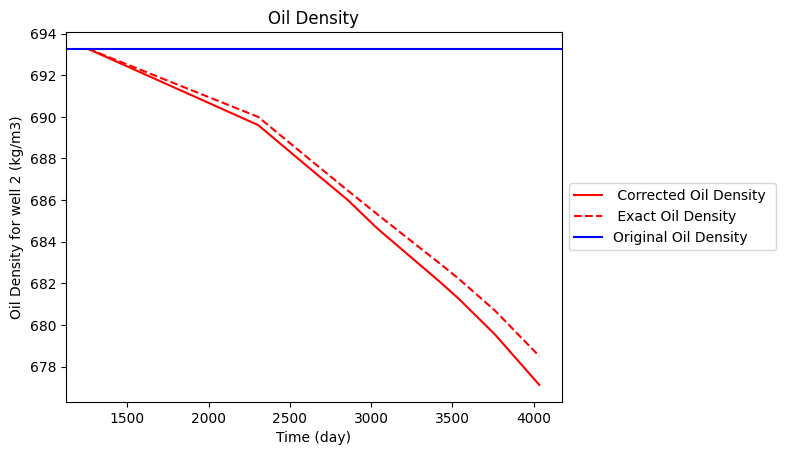

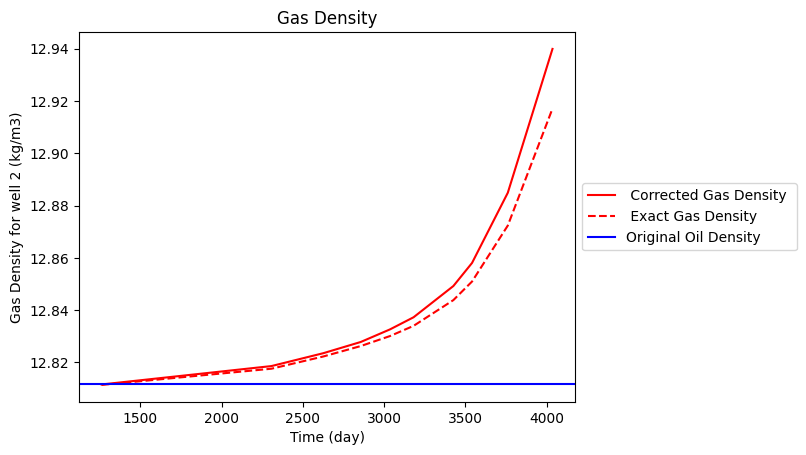

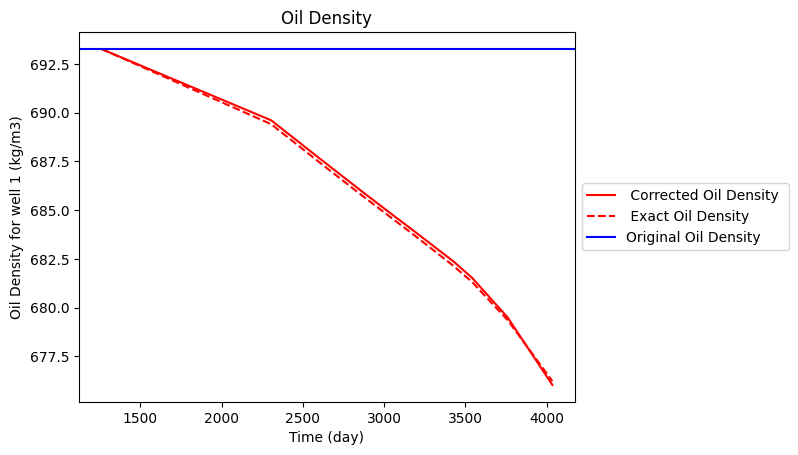

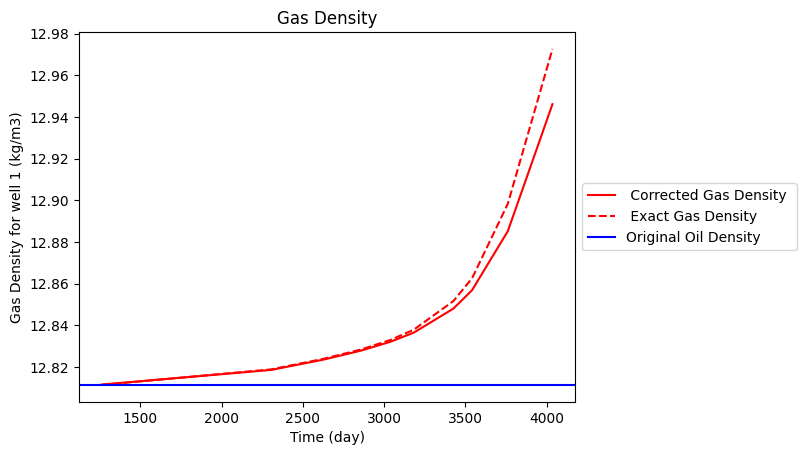

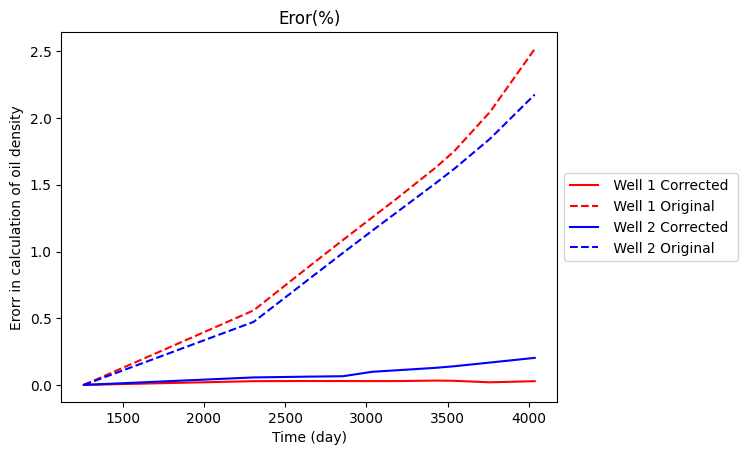

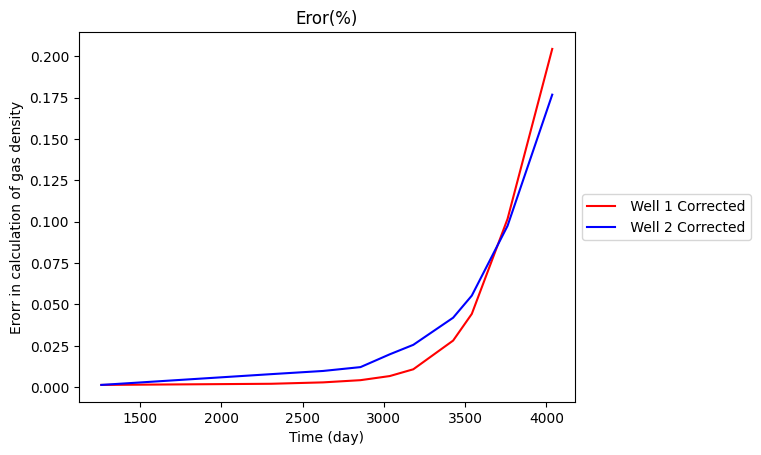

In [ ]:
plt.plot(time , New_Density_oil_2 , color = 'red', label= ' Corrected Oil Density ')
plt.plot(time , Exact_Density_oil_2 , color = 'red', label= ' Exact Oil Density ', linestyle='dashed')
plt.axhline(y = Density_original_oil, color='blue', label='Original Oil Density')
plt.ylim()
plt.xlabel('Time (day)')
plt.ylabel('Oil Density for well 2 (kg/m3)')
plt.title('Oil Density')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#-------------------------------------------------------------------------------

plt.plot(time , New_Density_gas_2 , color = 'red', label= ' Corrected Gas Density ')
plt.plot(time , Exact_Density_gas_2 , color = 'red', label= ' Exact Gas Density ', linestyle='dashed')
plt.axhline(y = Density_original_gas, color='blue', label='Original Oil Density')
plt.ylim()
plt.xlabel('Time (day)')
plt.ylabel('Gas Density for well 2 (kg/m3)')
plt.title('Gas Density')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#-------------------------------------------------------------------------------

plt.plot(time , New_Density_oil_1 , color = 'red', label= ' Corrected Oil Density ')
plt.plot(time , Exact_Density_oil_1 , color = 'red', label= ' Exact Oil Density ', linestyle='dashed')
plt.axhline(y = Density_original_oil, color='blue', label='Original Oil Density')
plt.ylim()
plt.xlabel('Time (day)')
plt.ylabel('Oil Density for well 1 (kg/m3)')
plt.title('Oil Density')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#-------------------------------------------------------------------------------

plt.plot(time , New_Density_gas_1 , color = 'red', label= ' Corrected Gas Density ')
plt.plot(time , Exact_Density_gas_1 , color = 'red', label= ' Exact Gas Density ', linestyle='dashed')
plt.axhline(y = Density_original_gas, color='blue', label='Original Oil Density')
plt.ylim()
plt.xlabel('Time (day)')
plt.ylabel('Gas Density for well 1 (kg/m3)')
plt.title('Gas Density')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#-------------------------------------------------------------------------------

Erorr_Density_1 = np.zeros(len(time))
Erorr_Density_2 = np.zeros(len(time))
Error_3 = np.zeros(len(time))
Error_4 = np.zeros(len(time))
nn = 0

for nn in range(len(time)):
  Erorr_Density_2 [nn] = np.abs(((New_Density_oil_2 [nn] - Exact_Density_oil_2 [nn])/ Exact_Density_oil_2 [nn])*100)
  Erorr_Density_1 [nn] = np.abs(((New_Density_oil_1 [nn] - Exact_Density_oil_1 [nn])/ Exact_Density_oil_1 [nn])*100)
  Error_3 [nn] = np.abs(((Density_original_oil - Exact_Density_oil_1 [nn])/ Exact_Density_oil_1 [nn])*100)
  Error_4 [nn] = np.abs(((Density_original_oil - Exact_Density_oil_2 [nn])/ Exact_Density_oil_2 [nn])*100)

plt.plot(time  , Erorr_Density_1  , color = 'red', label= ' Well 1 Corrected')
plt.plot(time  , Error_3  , color = 'red', label= ' Well 1 Original', linestyle='dashed')
plt.plot(time  , Erorr_Density_2  , color = 'Blue', label= ' Well 2 Corrected ')
plt.plot(time , Error_4 , color = 'Blue', label= ' Well 2 Original ', linestyle='dashed')
plt.ylim()
plt.xlabel('Time (day)')
plt.ylabel('Erorr in calculation of oil density')
plt.title('Eror(%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#-------------------------------------------------------------------------------

Erorr_Density_1 = np.zeros(len(time))
Erorr_Density_2 = np.zeros(len(time))
Error_3 = np.zeros(len(time))
Error_4 = np.zeros(len(time))
nn = 0

for nn in range(len(time)):
  Erorr_Density_2 [nn] = np.abs(((New_Density_gas_2 [nn] - Exact_Density_gas_2 [nn])/ Exact_Density_gas_2 [nn])*100)
  Error_3 [nn] = np.abs(((Density_original_gas - Exact_Density_gas_2 [nn])/ Exact_Density_gas_2 [nn])*100)
  Erorr_Density_1 [nn] = np.abs(((New_Density_gas_1 [nn] - Exact_Density_gas_1 [nn])/ Exact_Density_gas_1 [nn])*100)
  Error_4 = np.abs(((Density_original_gas - Exact_Density_gas_1 [nn])/ Exact_Density_gas_1 [nn])*100)

plt.plot(time , Erorr_Density_1 , color = 'red', label= ' Well 1 Corrected')
#plt.plot(time [274:600] , Error_4 [274:600] , color = 'red', label= ' Well 1 Original', linestyle='dashed')
plt.plot(time , Erorr_Density_2 , color = 'Blue', label= ' Well 2 Corrected')
#plt.plot(time [274:600] , Error_3 [274:600] , color = 'Blue', label= ' Well 2 Original', linestyle='dashed')
plt.ylim()
plt.xlabel('Time (day)')
plt.ylabel('Erorr in calculation of gas density')
plt.title('Eror(%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

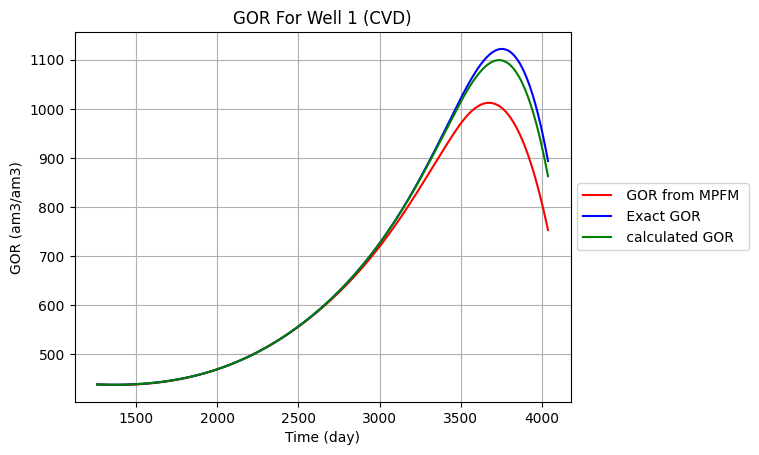

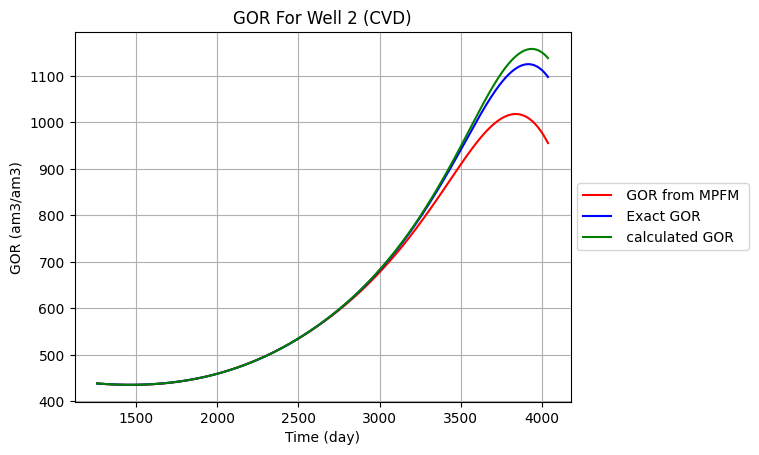

In [ ]:
from scipy.interpolate import interp1d
#convert string/object to float
time = time.astype(float)

# Now we need to remove any non-numeric or `NaN` values from these arrays
time_clean = time[~np.isnan(time)]
Exact_GOR_1_clean = Exact_GOR_1[~np.isnan(Exact_GOR_1)]
Exact_GOR_2_clean = Exact_GOR_2[~np.isnan(Exact_GOR_2)]
GOR_MPFM_1_clean = GOR_MPFM_1[~np.isnan(GOR_MPFM_1)]
GOR_MPFM_2_clean = GOR_MPFM_2[~np.isnan(GOR_MPFM_2)]
GOR_Calculated_1_clean = GOR_Calculated_1[~np.isnan(GOR_Calculated_1)]
GOR_Calculated_2_clean = GOR_Calculated_2[~np.isnan(GOR_Calculated_2)]

# Create a fine grid
xnew = np.linspace(time_clean.min(), time_clean.max(), 500)
Exact_GOR_1_interp = interp1d(time_clean, Exact_GOR_1_clean, kind='cubic')
Exact_GOR_2_interp = interp1d(time_clean, Exact_GOR_2_clean, kind='cubic')
GOR_MPFM_1_interp = interp1d(time_clean, GOR_MPFM_1_clean, kind='cubic')
GOR_MPFM_2_interp = interp1d(time_clean, GOR_MPFM_2_clean, kind='cubic')
GOR_Calculated_1_interp = interp1d(time_clean, GOR_Calculated_1_clean, kind='cubic')
GOR_Calculated_2_interp = interp1d(time_clean, GOR_Calculated_2_clean, kind='cubic')

Exact_GOR_1_smooth = Exact_GOR_1_interp(xnew)
Exact_GOR_2_smooth = Exact_GOR_2_interp(xnew)
GOR_MPFM_1_smooth = GOR_MPFM_1_interp(xnew)
GOR_MPFM_2_smooth = GOR_MPFM_2_interp(xnew)
GOR_Calculated_1_smooth = GOR_Calculated_1_interp(xnew)
GOR_Calculated_2_smooth = GOR_Calculated_2_interp(xnew)

plt.plot(xnew, GOR_MPFM_1_smooth, color = 'red', label= ' GOR from MPFM ')
plt.plot(xnew, Exact_GOR_1_smooth, color = 'blue', label= ' Exact GOR ')
plt.plot(xnew, GOR_Calculated_1_smooth, color = 'Green', label= ' calculated GOR')
plt.ylim()
plt.xlabel('Time (day)')
plt.grid()
plt.ylabel('GOR (am3/am3)')
plt.title('GOR For Well 1 (CVD)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(xnew, GOR_MPFM_2_smooth, color = 'red', label= ' GOR from MPFM ')
plt.plot(xnew, Exact_GOR_2_smooth, color = 'blue', label= ' Exact GOR ')
plt.plot(xnew, GOR_Calculated_2_smooth, color = 'Green', label= ' calculated GOR')
plt.ylim()
plt.xlabel('Time (day)')
plt.grid()
plt.ylabel('GOR (am3/am3)')
plt.title('GOR For Well 2 (CVD)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()